In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# 출력 옵션 변경
pd.set_option('display.max_columns', 70)
pd.set_option('display.max_rows', 100)

In [122]:
# 2018년 수질 데이터
df = pd.read_excel('../data/water_2018.xlsx')
df.head()

,검사월,수도사업자,시설명,소재지,수원,시설용량(㎥/일),채수년월일,일반세균(기준:100/ 단위:(CFU/mL)),총대장균군(기준:0/ 단위:MPN),대장균/분원성대장균군(기준:0/ 단위:MPN),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,강북,경기도 남양주시,하천수,1000000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,적합,적합,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,광암,경기도 하남시,하천수,400000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,적합,적합,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,구의,서울특별시 광진구,하천수,500000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,적합,적합,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,0.05,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,뚝도,서울특별시 성동구,하천수,700000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,적합,적합,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,0.05,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,암사,서울특별시 강동구,하천수,1600000,2018-01-02,0,불검출,불검출,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,적합,적합,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,0.05,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [123]:
df.shape

(4985, 66)

In [124]:
# 필요없는 컬럼 drop
df.drop(['시설명', '소재지', '수원', '채수년월일'], axis=1, inplace=True)

In [125]:
# dtype 확인 - object: 총대장균, 대장균, 냄새, 맛
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   검사월                                     4985 non-null   object 
 1   수도사업자                                   4985 non-null   object 
 2   시설용량(㎥/일)                               4985 non-null   int64  
 3   일반세균(기준:100/ 단위:(CFU/mL))               4985 non-null   int64  
 4   총대장균군(기준:0/ 단위:MPN)                     4985 non-null   object 
 5   대장균/분원성대장균군(기준:0/ 단위:MPN)               4985 non-null   object 
 6   납(기준:0.01/ 단위:(mg/L))                   4953 non-null   float64
 7   불소(기준:1.5/ 단위:(mg/L))                   4985 non-null   float64
 8   비소(기준:0.01/ 단위:(mg/L))                  4953 non-null   float64
 9   셀레늄(기준:0.01/ 단위:(mg/L))                 4953 non-null   float64
 10  수은(기준:0.001/ 단위:(mg/L))                 4953 non-null   floa

In [126]:
# 총대장균, 대장균 컬럼(8~9열)에서 '불검출' 개수 확인하여 많으면 컬럼을 삭제하도록 함
# df.iloc[:, 8].value_counts()
# df.iloc[:, 9].value_counts()

# 위 두 컬럼은 제외
df = df.drop(['총대장균군(기준:0/ 단위:MPN)', '대장균/분원성대장균군(기준:0/ 단위:MPN)'], axis=1)
df.head(2)

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),냄새(기준:0/ 단위:(mg/L)),맛(기준:0/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,적합,적합,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,적합,적합,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0,0.0,0.002,0.003,0.0,0.0


In [127]:
# 냄새, 맛 컬럼
# df.loc[:, '냄새(기준:0/ 단위:(mg/L))'].value_counts()   
# df.loc[:, '맛(기준:0/ 단위:(mg/L))'].value_counts()        # 모두 적합이므로 컬럼 삭제

df = df.drop(['냄새(기준:0/ 단위:(mg/L))', '맛(기준:0/ 단위:(mg/L))'], axis=1)
df.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),탁도(기준:0.5/ 단위:(NTU)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,0.05,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,0.05,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,0.05,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,0.05,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,0.05,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


In [128]:
df.shape

(4985, 58)

In [129]:
# 탁도 단위(NTU)의 호환성 때문에 컬럼 drop
df.drop('탁도(기준:0.5/ 단위:(NTU))', axis=1, inplace=True)
df.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),수은(기준:0.001/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),크롬(기준:0.05/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),페놀(기준:0.005/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),파라티온(기준:0.06/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",페니트로티온(기준:0.04/ 단위:(mg/L)),카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70,1.0,0.0,0,0.0,7.1,0.000,23.7,141,0.0,0.0,15,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,1.2,0.0,0,0.0,7.1,0.005,22.5,134,0.0,0.0,14,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72,0.5,0.0,0,0.0,7.2,0.000,28.0,155,0.0,0.0,17,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74,0.7,0.0,0,0.0,7.3,0.000,28.3,157,0.0,0.0,18,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75,1.1,0.0,0,0.0,7.2,0.005,29.8,163,0.0,0.0,18,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0


* 탁도: NTU --> SiO2 ppm (1mg/1L)  -->  단위 환산의 부정확성 때문에 drop
* 색도 1도: 백금 1㎎이 물 1L에 용해되어 있을 때 나타나는 색  -->  mg/L이므로 계산에 문제 없음
* 나중에 분석이 다 끝나고 나면 컬럼명을 간단하게 바꾸는 것이 좋을 수도 있을 듯!

## 여기서부터 전처리 방법 다르게 하셔야 합니다!!
* 김소리: NaN을 0으로 치환하여 0과 NaN을 똑같이 취급함

In [130]:
df.shape

(4985, 57)

In [131]:
df = df.dropna(axis=0) 
df.isnull().sum()

검사월                                       0
수도사업자                                     0
시설용량(㎥/일)                                 0
일반세균(기준:100/ 단위:(CFU/mL))                 0
납(기준:0.01/ 단위:(mg/L))                     0
불소(기준:1.5/ 단위:(mg/L))                     0
비소(기준:0.01/ 단위:(mg/L))                    0
셀레늄(기준:0.01/ 단위:(mg/L))                   0
수은(기준:0.001/ 단위:(mg/L))                   0
시안(기준:0.01/ 단위:(mg/L))                    0
크롬(기준:0.05/ 단위:(mg/L))                    0
암모니아성질소(기준:0.5/ 단위:(mg/L))                0
질산성질소(기준:10/ 단위:(mg/L))                   0
카드뮴(기준:0.005/ 단위:(mg/L))                  0
붕소(기준:1/ 단위:(mg/L))                       0
페놀(기준:0.005/ 단위:(mg/L))                   0
다이아지논(기준:0.02/ 단위:(mg/L))                 0
파라티온(기준:0.06/ 단위:(mg/L))                  0
1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))    0
페니트로티온(기준:0.04/ 단위:(mg/L))                0
카바릴(기준:0.07/ 단위:(mg/L))                   0
1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))          0
테트라클로로에틸렌(기준:0.01/ 단위:(mg/L))   

In [132]:
df.shape

(4657, 57)

In [133]:
# 0을 NaN로 바꾸고 결측치 개수 = 행 개수(4985)인 경우만 drop하기 
df.replace(0, np.nan, inplace=True)

# 모든 컬럼에 대하여 결측치 개수 확인
nan_num = df.isnull().sum()                        # 결측치 수
drop_list = list(nan_num[nan_num == len(df)].index)   # drop할 컬럼명 list (5개 항목)
water = df.drop(drop_list, axis=1)                 # 수질 전처리 파일명: water 

In [134]:
water.head()

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,1.0,NaN,NaN,NaN,7.1,NaN,23.7,141.0,NaN,NaN,15.0,NaN,NaN,0.010,0.42,0.007,NaN,NaN,NaN,NaN,0.005,0.003,NaN,NaN
1,2018-01,서울특별시,400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,1.2,NaN,NaN,NaN,7.1,0.005,22.5,134.0,NaN,NaN,14.0,NaN,NaN,0.009,0.29,0.006,0.0007,NaN,NaN,NaN,0.002,0.003,NaN,NaN
2,2018-01,서울특별시,500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,0.5,NaN,NaN,NaN,7.2,NaN,28.0,155.0,NaN,NaN,17.0,NaN,NaN,0.013,0.34,0.009,0.0006,NaN,NaN,NaN,0.005,0.004,NaN,NaN
3,2018-01,서울특별시,700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,0.7,NaN,NaN,NaN,7.3,NaN,28.3,157.0,NaN,NaN,18.0,NaN,NaN,0.013,0.35,0.010,NaN,NaN,NaN,NaN,0.003,0.003,NaN,NaN
4,2018-01,서울특별시,1600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,1.1,NaN,NaN,NaN,7.2,0.005,29.8,163.0,NaN,NaN,18.0,NaN,NaN,0.010,0.40,0.007,0.0008,NaN,0.0005,NaN,0.006,0.003,NaN,NaN


In [135]:
print(water.shape)
print(water.columns)

(4657, 52)
Index(['검사월', '수도사업자', '시설용량(㎥/일)', '일반세균(기준:100/ 단위:(CFU/mL))',
       '납(기준:0.01/ 단위:(mg/L))', '불소(기준:1.5/ 단위:(mg/L))',
       '비소(기준:0.01/ 단위:(mg/L))', '셀레늄(기준:0.01/ 단위:(mg/L))',
       '시안(기준:0.01/ 단위:(mg/L))', '암모니아성질소(기준:0.5/ 단위:(mg/L))',
       '질산성질소(기준:10/ 단위:(mg/L))', '카드뮴(기준:0.005/ 단위:(mg/L))',
       '붕소(기준:1/ 단위:(mg/L))', '다이아지논(기준:0.02/ 단위:(mg/L))',
       '1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))', '카바릴(기준:0.07/ 단위:(mg/L))',
       '1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))', '테트라클로로에틸렌(기준:0.01/ 단위:(mg/L))',
       '트리클로로에틸렌(기준:0.03/ 단위:(mg/L))', '디클로로메탄(기준:0.02/ 단위:(mg/L))',
       '벤젠(기준:0.01/ 단위:(mg/L))', '톨루엔(기준:0.7/ 단위:(mg/L))',
       '에틸벤젠(기준:0.3/ 단위:(mg/L))', '크실렌(기준:0.5/ 단위:(mg/L))',
       '1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))', '사염화탄소(기준:0.002/ 단위:(mg/L))',
       '1,4-다이옥산(기준:0.05/ 단위:(mg/L))', '경도(기준:300/ 단위:(mg/L))',
       '과망간산칼륨소비량(기준:10/ 단위:(mg/L))', '동(기준:1/ 단위:(mg/L))', '색도(기준:5/ 단위:(도))',
       '세제(기준:0.5/ 단위:(mg/L))', '수소이온농도(기준:5.8 ~ 8.5/ 단위:-)',
     

In [136]:
# 남은 NaN은 다시 0으로 되돌리기
water.fillna(0, inplace=True)
water

,검사월,수도사업자,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,7.1,0.000,23.7,141.0,0.0,0.000,15.0,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0000,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1.2,0.0,0.0,0.0,7.1,0.005,22.5,134.0,0.0,0.000,14.0,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0000,0.0,0.002,0.003,0.0,0.0
2,2018-01,서울특별시,500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.5,0.0,0.0,0.0,7.2,0.000,28.0,155.0,0.0,0.000,17.0,0.0,0.0,0.013,0.34,0.009,0.0006,0.0,0.0000,0.0,0.005,0.004,0.0,0.0
3,2018-01,서울특별시,700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0.7,0.0,0.0,0.0,7.3,0.000,28.3,157.0,0.0,0.000,18.0,0.0,0.0,0.013,0.35,0.010,0.0000,0.0,0.0000,0.0,0.003,0.003,0.0,0.0
4,2018-01,서울특별시,1600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,1.1,0.0,0.0,0.0,7.2,0.005,29.8,163.0,0.0,0.000,18.0,0.0,0.0,0.010,0.40,0.007,0.0008,0.0,0.0005,0.0,0.006,0.003,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,2018-12,경상남도 거창군,800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,4.3,0.0,0.0,0.0,7.1,0.004,4.2,57.0,0.0,0.007,0.0,0.0,0.0,0.017,0.88,0.017,0.0077,0.0,0.0046,0.0,0.057,0.000,0.0,0.0
4964,2018-12,경상남도 합천군,2200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,2.5,0.0,0.0,0.0,7.4,0.043,11.2,89.0,0.0,0.000,4.0,0.0,0.0,0.014,0.23,0.014,0.0051,0.0,0.0027,0.0,0.020,0.000,0.0,0.0
4965,2018-12,경상남도 합천군,2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.8,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.6,0.0,0.0,0.0,7.0,0.070,14.5,181.0,0.0,0.014,17.0,0.0,0.0,0.004,0.00,0.004,0.0022,0.0,0.0027,0.0,0.008,0.000,0.0,0.0
4966,2018-12,경상남도 합천군,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,2.7,0.0,0.0,0.0,7.4,0.009,10.8,127.0,0.0,0.000,6.0,0.0,0.0,0.008,0.30,0.008,0.0031,0.0,0.0033,0.0,0.017,0.000,0.0,0.0


In [137]:
water.rename({'수도사업자':'지역'}, axis=1, inplace=True)
water.head(2)

,검사월,지역,시설용량(㎥/일),일반세균(기준:100/ 단위:(CFU/mL)),납(기준:0.01/ 단위:(mg/L)),불소(기준:1.5/ 단위:(mg/L)),비소(기준:0.01/ 단위:(mg/L)),셀레늄(기준:0.01/ 단위:(mg/L)),시안(기준:0.01/ 단위:(mg/L)),암모니아성질소(기준:0.5/ 단위:(mg/L)),질산성질소(기준:10/ 단위:(mg/L)),카드뮴(기준:0.005/ 단위:(mg/L)),붕소(기준:1/ 단위:(mg/L)),다이아지논(기준:0.02/ 단위:(mg/L)),"1,2-디브로모-3-클로로프로판(기준:0.003/ 단위:(mg/L))",카바릴(기준:0.07/ 단위:(mg/L)),"1,1,1-트리클로로에탄(기준:0.1/ 단위:(mg/L))",테트라클로로에틸렌(기준:0.01/ 단위:(mg/L)),트리클로로에틸렌(기준:0.03/ 단위:(mg/L)),디클로로메탄(기준:0.02/ 단위:(mg/L)),벤젠(기준:0.01/ 단위:(mg/L)),톨루엔(기준:0.7/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),크실렌(기준:0.5/ 단위:(mg/L)),"1,1-디클로로에틸렌(기준:0.03/ 단위:(mg/L))",사염화탄소(기준:0.002/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",경도(기준:300/ 단위:(mg/L)),과망간산칼륨소비량(기준:10/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),색도(기준:5/ 단위:(도)),세제(기준:0.5/ 단위:(mg/L)),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),아연(기준:3/ 단위:(mg/L)),염소이온(기준:250/ 단위:(mg/L)),증발잔류물(기준:500/ 단위:(mg/L)),철(기준:0.3/ 단위:(mg/L)),망간(기준:0.05/ 단위:(mg/L)),황산이온(기준:200/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),브롬산염(기준:0.01/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),잔류염소(기준:4/ 단위:(mg/L)),클로로포름(기준:0.08/ 단위:(mg/L)),클로랄하이드레이트(기준:0.03/ 단위:(mg/L)),디브로모아세토니트릴(기준:0.1/ 단위:(mg/L)),디클로로아세토니트릴(기준:0.09/ 단위:(mg/L)),트리클로로아세토니트릴(기준:0.004/ 단위:(mg/L)),할로아세틱에시드(기준:0.1/ 단위:(mg/L)),브로모디클로로메탄(기준:0.03/ 단위:(mg/L)),디브로모클로로메탄(기준:0.1/ 단위:(mg/L)),포름알데히드(기준:0.5/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,1.0,0.0,0.0,0.0,7.1,0.000,23.7,141.0,0.0,0.0,15.0,0.0,0.0,0.010,0.42,0.007,0.0000,0.0,0.0,0.0,0.005,0.003,0.0,0.0
1,2018-01,서울특별시,400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,1.2,0.0,0.0,0.0,7.1,0.005,22.5,134.0,0.0,0.0,14.0,0.0,0.0,0.009,0.29,0.006,0.0007,0.0,0.0,0.0,0.002,0.003,0.0,0.0


In [138]:
water = water[['검사월', '지역','시설용량(㎥/일)','수소이온농도(기준:5.8 ~ 8.5/ 단위:-)', '망간(기준:0.05/ 단위:(mg/L))', '아연(기준:3/ 단위:(mg/L))', '1,4-다이옥산(기준:0.05/ 단위:(mg/L))', '일반세균(기준:100/ 단위:(CFU/mL))', '비소(기준:0.01/ 단위:(mg/L))','알루미늄(기준:0.2/ 단위:(mg/L))', '에틸벤젠(기준:0.3/ 단위:(mg/L))', '동(기준:1/ 단위:(mg/L))', '총트리할로메탄(기준:0.1/ 단위:(mg/L))', '테트라클로로에틸렌(기준:0.01/ 단위:(mg/L))']]
water

,검사월,지역,시설용량(㎥/일),수소이온농도(기준:5.8 ~ 8.5/ 단위:-),망간(기준:0.05/ 단위:(mg/L)),아연(기준:3/ 단위:(mg/L)),"1,4-다이옥산(기준:0.05/ 단위:(mg/L))",일반세균(기준:100/ 단위:(CFU/mL)),비소(기준:0.01/ 단위:(mg/L)),알루미늄(기준:0.2/ 단위:(mg/L)),에틸벤젠(기준:0.3/ 단위:(mg/L)),동(기준:1/ 단위:(mg/L)),총트리할로메탄(기준:0.1/ 단위:(mg/L)),테트라클로로에틸렌(기준:0.01/ 단위:(mg/L))
0,2018-01,서울특별시,1000000,7.1,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.010,0.0
1,2018-01,서울특별시,400000,7.1,0.000,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.009,0.0
2,2018-01,서울특별시,500000,7.2,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.013,0.0
3,2018-01,서울특별시,700000,7.3,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.013,0.0
4,2018-01,서울특별시,1600000,7.2,0.000,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.010,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,2018-12,경상남도 거창군,800,7.1,0.007,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.017,0.0
4964,2018-12,경상남도 합천군,2200,7.4,0.000,0.043,0.0,0.0,0.0,0.0,0.0,0.0,0.014,0.0
4965,2018-12,경상남도 합천군,2000,7.0,0.014,0.070,0.0,0.0,0.0,0.0,0.0,0.0,0.004,0.0
4966,2018-12,경상남도 합천군,10000,7.4,0.000,0.009,0.0,0.0,0.0,0.0,0.0,0.0,0.008,0.0


* 수소이온농도(pH) = -log10[H+]

In [139]:
# Analysis
class fx:
    def waterQualByCity():
        '''
        각 지역별 1년 평균 물질 농도를 계산하여 dataframe을 반환하는 함수
        '''
        
        lst = []   # Dataframe 만들기 위해서 준비
        cities = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']
        concs = water.columns[3:]
        
        for city in cities:
            ct_conc = [city]        # 하나의 도시에 대해, 이름과 모든 물질의 농도를 모은 리스트
            for conc in concs:
                ct_water = water[water['지역'].str.contains(city)]
                if conc == '일반세균(기준:100/ 단위:(CFU/mL))':
                    ct_water['월별물질농도(CFU/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * (10**6)
                    t_conc = ct_water['월별물질농도(CFU/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * (10**-6)  # 2018년, xx지역, 일반세균 평균 농도(CFU/mL)
                
                elif conc == '수소이온농도(기준:5.8 ~ 8.5/ 단위:-)':
                    ct_water[conc] = ct_water[conc].apply(lambda x: 1/ 10**x)   # pH를 [H+](단위:mol/L)로 바꾸는 과정
                    
                    ct_water['월별물질농도(mol/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
                    t_conc = ct_water['월별물질농도(mol/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * 0.001   # 2018년, xx지역, 수소이온 평균 농도(mol/L)
                    t_conc = -np.log10(t_conc)  # 원래대로 pH로 변환
                
                else:    # '색도'포함
                    ct_water['월별물질농도(mg/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000  
                    t_conc = ct_water['월별물질농도(mg/일)'].sum() / ct_water['시설용량(㎥/일)'].sum() * 0.001   # 2018년, xx지역, xx 물질 평균 농도(mg/L)
                ct_conc.append(t_conc)
            lst.append(ct_conc)
        
        result = pd.DataFrame(lst, columns=['지역'] + list(concs))
        return result
            
    
if __name__ == '__main__':
    fx.waterQualByCity() 

<ipython-input-139-3c3e61902c8a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water[conc] = ct_water[conc].apply(lambda x: 1/ 10**x)   # pH를 [H+](단위:mol/L)로 바꾸는 과정
<ipython-input-139-3c3e61902c8a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(mol/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
<ipython-input-139-3c3e61902c8a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

### 중요한 포인트
* cities 변수와 반환되는 값은 '세종특별자치시'를 포함하고 있음
---
---

In [140]:
# 2008~2018년(4~15 sheet) 건강지표 데이터 - 커서 돌리는데 오래 걸리기 때문에 1년씩 돌렸음
h_idx = ['시도', '비만율(신체계측)_표준화율', '삶의 질 지수(EQ-5D)_표준화율', '양호한 주관적 건강수준 인지율_표준화율', 
         '행복감 지수_표준화율', '스트레스 인지율_표준화율', '우울감 경험률_표준화율', '인지장애 경험률(50세 이상)_표준화율', 
         '주관적 구강건강이 나쁜 인구의 분율_표준화율', '스트레스로 인한 정신상담률_표준화율', '우울증상으로 인한 정신상담률_표준화율', 
         '연간 보건기관 이용률_표준화율']

df1 = pd.read_excel('../data/health_2008_2018.xlsx', sheet_name=15, usecols=h_idx, nrows=18)    # type: dictionary

In [141]:
df1.head()

,시도,비만율(신체계측)_표준화율,삶의 질 지수(EQ-5D)_표준화율,양호한 주관적 건강수준 인지율_표준화율,행복감 지수_표준화율,스트레스 인지율_표준화율,우울감 경험률_표준화율,인지장애 경험률(50세 이상)_표준화율,주관적 구강건강이 나쁜 인구의 분율_표준화율,스트레스로 인한 정신상담률_표준화율,우울증상으로 인한 정신상담률_표준화율,연간 보건기관 이용률_표준화율
0,전국,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시,31.3,0.953,44.5,7.1,27.2,6.5,21.6,22.9,10.9,25.7,19.8
2,부산광역시,32.3,0.956,40.4,7.0,23.7,5.5,22.4,26.6,11.0,27.1,21.5
3,대구광역시,32.5,0.959,41.6,7.1,25.1,5.4,20.8,24.0,8.4,23.0,18.2
4,인천광역시,35.1,0.953,38.2,6.9,29.9,7.6,21.5,28.8,10.5,23.5,20.7


In [142]:
df1.shape

(18, 12)

In [143]:
# 첫 행 drop
health = df1.drop(index=0)
health.index = range(17)   # index 다시 0부터 시작하도록 재설정
health

,시도,비만율(신체계측)_표준화율,삶의 질 지수(EQ-5D)_표준화율,양호한 주관적 건강수준 인지율_표준화율,행복감 지수_표준화율,스트레스 인지율_표준화율,우울감 경험률_표준화율,인지장애 경험률(50세 이상)_표준화율,주관적 구강건강이 나쁜 인구의 분율_표준화율,스트레스로 인한 정신상담률_표준화율,우울증상으로 인한 정신상담률_표준화율,연간 보건기관 이용률_표준화율
0,서울특별시,31.3,0.953,44.5,7.1,27.2,6.5,21.6,22.9,10.9,25.7,19.8
1,부산광역시,32.3,0.956,40.4,7.0,23.7,5.5,22.4,26.6,11.0,27.1,21.5
2,대구광역시,32.5,0.959,41.6,7.1,25.1,5.4,20.8,24.0,8.4,23.0,18.2
3,인천광역시,35.1,0.953,38.2,6.9,29.9,7.6,21.5,28.8,10.5,23.5,20.7
4,광주광역시,33.3,0.958,41.3,7.0,28.1,5.4,32.2,27.9,8.2,16.9,21.8
5,대전광역시,30.0,0.967,52.4,7.2,25.2,4.2,15.3,20.8,10.6,31.1,18.4
6,울산광역시,33.1,0.959,43.8,7.1,23.9,5.4,17.6,24.1,8.5,25.1,24.4
7,세종특별자치시,31.0,0.965,44.7,7.5,29.2,4.9,24.4,22.9,6.2,9.7,24.8
8,경기도,33.6,0.956,40.8,7.0,27.7,6.5,23.3,25.4,8.6,21.7,19.7
9,강원도,35.0,0.953,43.8,7.2,24.9,5.7,18.6,26.0,11.5,25.5,32.8


## 데이터 분석 - MLR

In [144]:
# 각 데이터의 shape 확인
print(fx.waterQualByCity().shape, health.shape)    # 둘다 17행

<ipython-input-139-3c3e61902c8a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water[conc] = ct_water[conc].apply(lambda x: 1/ 10**x)   # pH를 [H+](단위:mol/L)로 바꾸는 과정
<ipython-input-139-3c3e61902c8a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(mol/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
<ipython-input-139-3c3e61902c8a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

(17, 12) (17, 12)


In [145]:
# 수질 데이터에는 '세종시'가 없기 때문에, 두 dataframe으로부터 모두 drop
x = fx.waterQualByCity().set_index('지역').drop('세종특별자치시', axis=0)
y = health.set_index('시도').drop('세종특별자치시', axis=0)

<ipython-input-139-3c3e61902c8a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water[conc] = ct_water[conc].apply(lambda x: 1/ 10**x)   # pH를 [H+](단위:mol/L)로 바꾸는 과정
<ipython-input-139-3c3e61902c8a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct_water['월별물질농도(mol/일)'] = ct_water['시설용량(㎥/일)'] * ct_water[conc] * 1000
<ipython-input-139-3c3e61902c8a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [146]:
# Standardization
from sklearn.preprocessing import StandardScaler

* waterQualByCity 함수에서는 '지역'을 index로 설정하지 않도록 했음
* '세종특별자치시'를 미리 제외한 채로 반환하지 않고, 제외하는 작업은 아래 단계에서 진행하도록 했음

In [147]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.09803056, -0.67921664, -0.61320484, -0.49320817, -0.52364234,
        -0.40884737, -0.14636365, -0.45936483, -0.06512982, -0.42679047,
        -0.28788725],
       [-0.55503871, -0.67921664, -0.28383459,  0.7822164 , -0.52364234,
        -0.40884737, -1.02287923, -0.45936483, -1.10586456,  0.31803225,
        -0.28788725],
       [-0.58627315, -0.65448452, -0.62107689, -0.49320817, -0.52364234,
        -0.40884737, -0.45538236, -0.45936483, -1.10586456,  0.1341624 ,
        -0.28788725],
       [ 1.13745679, -0.67877658, -1.46944732, -0.49320817, -0.52364234,
        -0.40884737,  1.70916561, -0.45936483, -1.08886371, -0.24910462,
        -0.28788725],
       [-1.07484095,  1.5380065 , -0.81062996, -0.49320817, -0.52364234,
        -0.40884737, -1.0193954 , -0.45936483, -1.10586456,  0.34370786,
        -0.28788725],
       [-0.69364956, -0.67921664, -1.16221537, -0.49320817, -0.52364234,
        -0.40884737, -0.74402723, -0.45936483, -1.10586456,  1.96980444,
        -0.287

In [148]:
# train, test data 나누기
from sklearn.model_selection import train_test_split

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.15, random_state=5)
x_train.shape, y_test.shape

((13, 11), (3, 11))

In [150]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [151]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [152]:
# Prediction
pd.DataFrame(lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,10
0,30.240730,0.959116,37.309256,6.907189,27.522710,6.584044,26.111800,24.572665,7.051683,19.920865,15.480729
1,33.476033,0.961584,37.851274,7.109670,22.741216,4.184048,24.286256,25.676470,5.788520,18.562570,22.271935
2,25.708609,0.944261,51.841190,6.751326,31.967710,12.388375,11.110528,17.991942,11.518479,31.541302,9.929560


In [153]:
# Evaluation
lr.score(x_test, y_test)    # R-squared < 0: overfitting ==> x값, y값 조정해야 한다

-7.602701717344761

In [154]:
# Visualization
import seaborn as sns

c:\users\jeaung-lee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\jeaung-lee\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


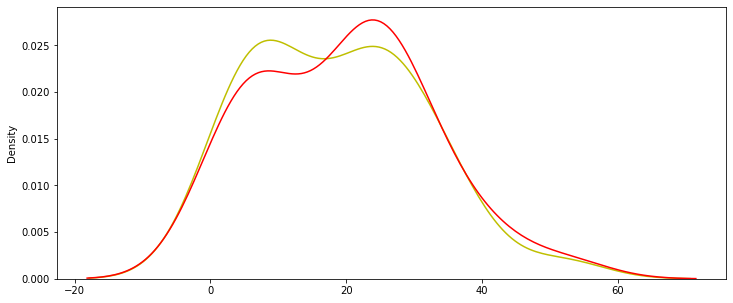

In [155]:
fig = plt.figure(figsize=(12, 5))

ax1 = sns.distplot(lr.predict(x_test), hist=False, color='y', label='Predicted Data')
ax2 = sns.distplot(y_test, hist=False,color='r', label='Actual Data', ax=ax1)